<h1>Day 1: Quantum Computing Fundamentals</h1>
<p><b>Workshop for the Computer Engineering Department, University of Tripoli</b></p>
<p><i>Prepared by Abdulmalek Baitulmal with Gemini</i></p>

## 🛠️ Setup: Installing & Verifying Libraries

This first code cell is very important. It will perform a **clean installation** of Qiskit and its dependencies to ensure all components are compatible and avoid version conflicts.

**Please run this cell, then RESTART THE KERNEL before proceeding.**

In [ ]:
# Uninstall all existing Qiskit packages to ensure a clean slate
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibmq-provider qiskit-ibm-provider

# Install the latest stable version of Qiskit and its required dependencies
!pip install -q qiskit qiskit-aer pylatexenc

print("✅ Clean installation complete!")
print("🔴 IMPORTANT: Please go to the 'Kernel' menu and select 'Restart Kernel' before running the next cell.")

### Core Imports

Now that our environment is clean, we'll import all the tools we need for this session. If the cell above worked and you restarted the kernel, this should run without errors.

In [1]:
# Core Qiskit components
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Visualization tools
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Standard library for math
import numpy as np

# Let's check the version to confirm
import qiskit
print(f"Qiskit Version: {qiskit.__version__}")

Qiskit Version: 2.1.2


<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains LaTeX macros for prettier math formulas.</td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $

## Part 1: The Basics of Quantum States

Welcome! In this first section, we'll build our understanding from the ground up, starting with the qubit and exploring the unique quantum properties that make it so powerful.

### From Classical Bits to Quantum Qubits

In classical computing, the **bit** is the fundamental unit of information, existing in one of two definite states: **0** or **1**. Quantum computing introduces the **qubit**, which can also be in the state $\ket{0}$ or $\ket{1}$. We visualize these as the North and South poles of the **Bloch Sphere**.

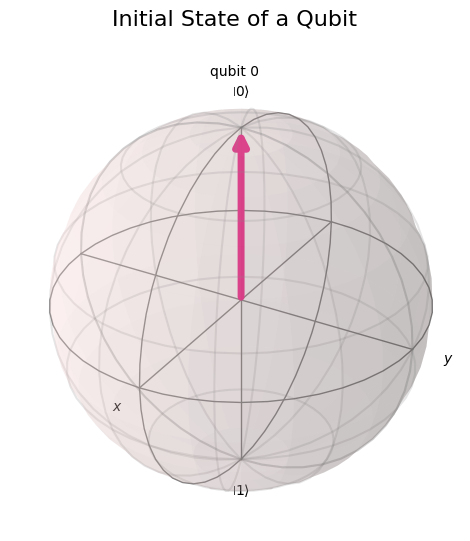

In [2]:
# A qubit always initializes in the |0> state
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)

# Let's visualize our qubit on the Bloch Sphere
display(plot_bloch_multivector(state, title="Initial State of a Qubit"))

### Superposition: The Quantum 'Both'

A qubit can exist in a combination of both $\ket{0}$ and $\ket{1}$ at the same time—a property called **superposition**. We use a **Hadamard gate (H-gate)** to create this state.

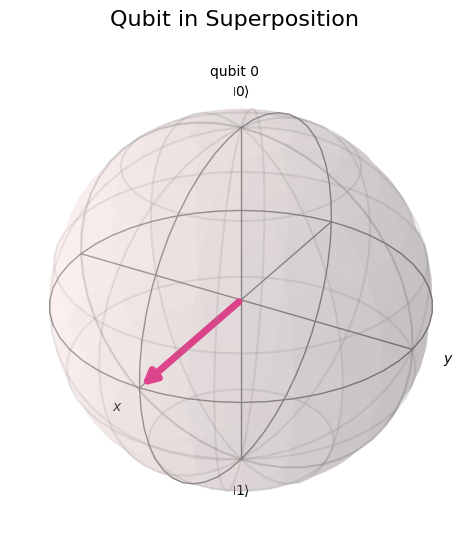

In [3]:
qc = QuantumCircuit(1)
qc.h(0)

# Let's see the new state on the equator of the Bloch Sphere
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state, title="Qubit in Superposition"))

### Measurement: Collapsing the Possibilities

When we **measure** a qubit in superposition, it randomly collapses to a classical state of either 0 or 1. For an equal superposition, we expect a 50/50 probability distribution.

Circuit Diagram:


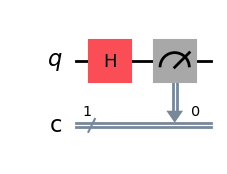


Measurement Results: {'0': 536, '1': 488}


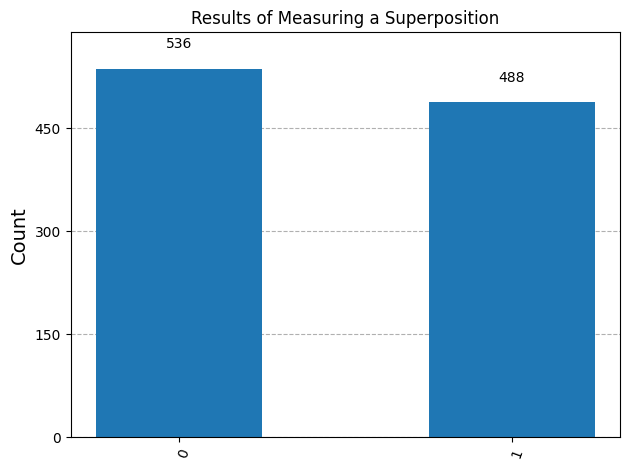

In [4]:
# Create a circuit with 1 qubit and 1 classical bit to hold the measurement
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

print("Circuit Diagram:")
display(qc.draw('mpl'))

# Initialize the simulator
simulator = AerSimulator()

# Run the circuit 1024 times
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Show the results
print(f"\nMeasurement Results: {counts}")
display(plot_histogram(counts, title='Results of Measuring a Superposition'))

---

## Part 2: A Visual Tour of Single-Qubit Gates

**Quantum gates** are operations that manipulate a qubit's state, which we can visualize as rotations on the Bloch Sphere.

### The Pauli Gates: Quantum Flips

The Pauli gates are fundamental operations that perform 180-degree rotations around the axes of the Bloch Sphere.

* **X-gate**: The quantum **NOT** gate. Rotates around the x-axis, flipping $\ket{0} \leftrightarrow \ket{1}$.
* **Y-gate**: Rotates around the y-axis.
* **Z-gate**: Rotates around the z-axis, inducing a phase flip. A purely quantum effect!

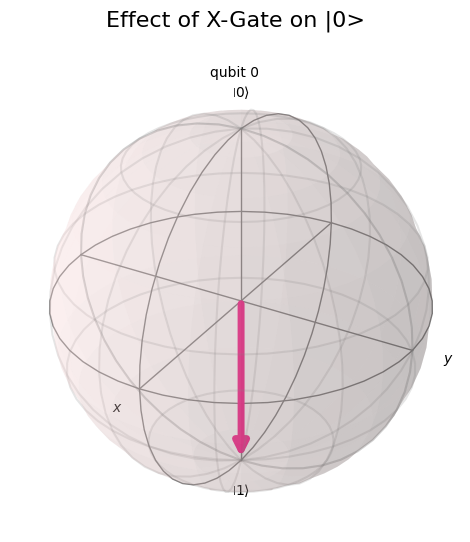

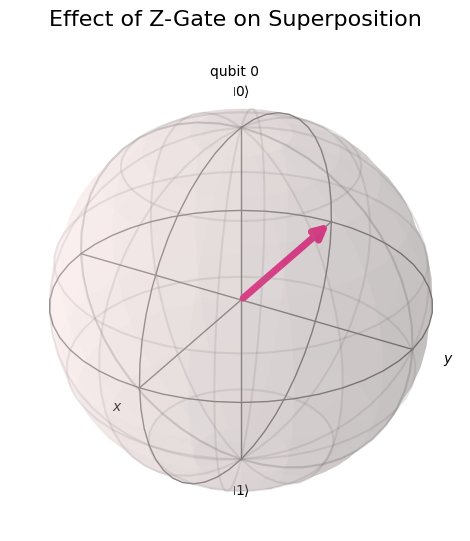

In [5]:
# Start with |0> and apply the X-gate
qc_x = QuantumCircuit(1)
qc_x.x(0)
state_x = Statevector.from_instruction(qc_x)
display(plot_bloch_multivector(state_x, title="Effect of X-Gate on |0>"))

# Start in superposition and apply the Z-gate
qc_z = QuantumCircuit(1)
qc_z.h(0)
qc_z.z(0)
state_z = Statevector.from_instruction(qc_z)
display(plot_bloch_multivector(state_z, title="Effect of Z-Gate on Superposition"))

### Rotation Gates: Fine-Tuning the State

What if we need more precise control? Rotation gates allow us to rotate the qubit's state by any angle we choose.

* **RX-gate**: Rotates around the x-axis by a given angle.
* **RY-gate**: Rotates around the y-axis by a given angle.
* **RZ-gate**: Rotates around the z-axis by a given angle.

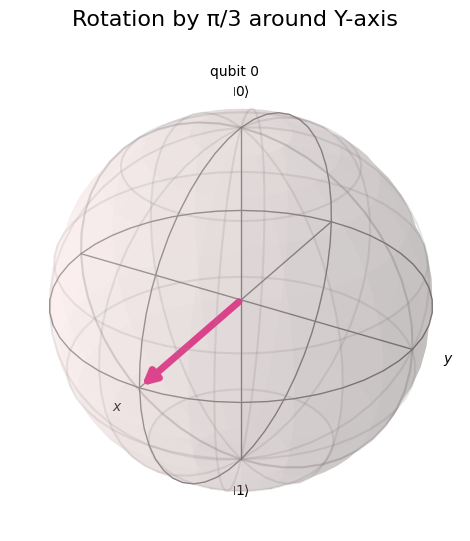

In [12]:
# Start with |0>
qc = QuantumCircuit(1)

# Let's rotate by PI/3 radians (60 degrees) around the Y-axis
angle = np.pi / 2
qc.ry(angle, 0)

# Visualize the result
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state, title="Rotation by π/3 around Y-axis"))

---

## Part 3: The Leap to Multiple Qubits & Entanglement

The true power of quantum computing emerges when qubits interact. Multi-qubit gates create these interactions.

### The CNOT Gate: A Quantum IF Statement

The **Controlled-NOT (CNOT)** gate uses a **control** qubit to conditionally apply an X-gate to a **target** qubit.

> **IF** the control qubit is $\ket{1}$, **THEN** flip the target qubit.

Circuit Diagram:


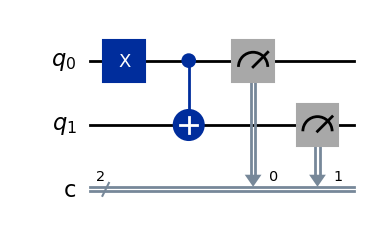


Result: {'11': 1}


In [13]:
qc = QuantumCircuit(2, 2)

# Set the control qubit (q0) to |1>
qc.x(0)

# Apply CNOT: control=q0, target=q1
qc.cx(0, 1)
qc.measure([0,1], [0,1])

print("Circuit Diagram:")
display(qc.draw('mpl'))

# Run the circuit. Initial state was |10>, final should be |11>
job = simulator.run(qc, shots=1)
result = job.result()
counts = result.get_counts()
print(f"\nResult: {counts}")

### Creating Entanglement: The Bell State

**Entanglement** is a unique quantum link between qubits. We can create it with a simple recipe:
1.  Apply a Hadamard gate to one qubit.
2.  Apply a CNOT gate, using the first qubit as the control.

Circuit for creating a Bell State:


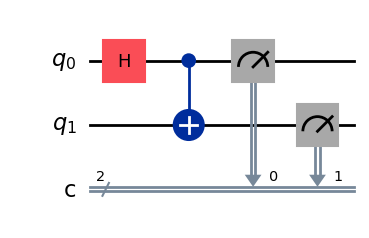


Results: {'11': 515, '00': 509}


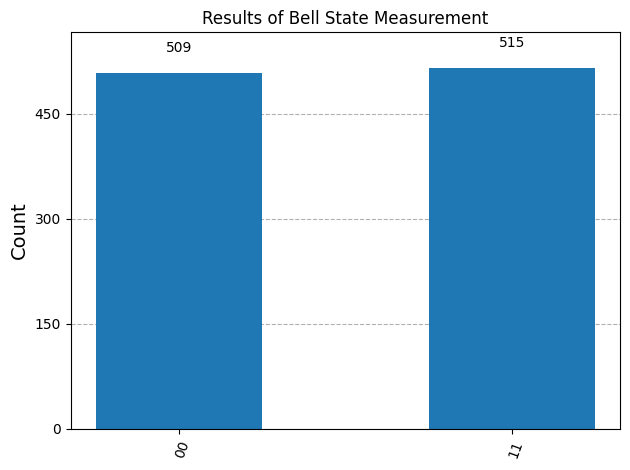


Notice we only get '00' or '11'. This perfect correlation is entanglement!


In [15]:
qc = QuantumCircuit(2, 2)

# 1. Apply H-gate to q0
qc.h(0)

# 2. Apply CNOT with q0 as control
qc.cx(0, 1)
qc.measure([0,1], [0,1])

print("Circuit for creating a Bell State:")
display(qc.draw('mpl'))

# Run and check the results
job = simulator.run(qc, shots=1024)
counts = job.result().get_counts()
print(f"\nResults: {counts}")
display(plot_histogram(counts, title='Results of Bell State Measurement'))
print("\nNotice we only get '00' or '11'. This perfect correlation is entanglement!")

### Other Important Multi-Qubit Gates

Let's briefly look at two more essential gates from your QSilver materials.

#### The SWAP Gate

The SWAP gate does exactly what its name implies: it swaps the states of two qubits. This is crucial for moving quantum information around a processor.

SWAP Gate Circuit:


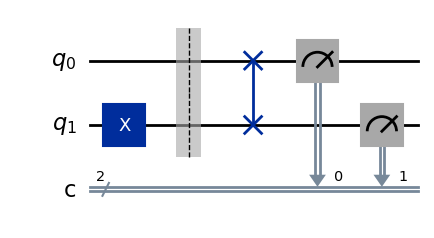


Result: {'01': 1} (Note: Qiskit's bit order is reversed, so '01' means q1=0, q0=1)


In [22]:
qc = QuantumCircuit(2, 2)

# Let's create the state |01>
qc.x(1)
qc.barrier()

# Apply the SWAP gate
qc.swap(0, 1)
qc.measure([0, 1], [0, 1])

print("SWAP Gate Circuit:")
display(qc.draw('mpl'))
# to display a reversed bits order
# display(qc.draw('mpl',reverse_bits=1))


# Run the circuit. The state should change from |01> to |10>
job = simulator.run(qc, shots=1)
counts = job.result().get_counts()
print(f"\nResult: {counts} (Note: Qiskit's bit order is reversed, so '01' means q1=0, q0=1)")

#### The Toffoli Gate (CCX)

The **Toffoli** gate, or Controlled-Controlled-NOT (CCX), is a three-qubit gate. It's a doubly-controlled NOT gate:

> **IF** control qubit 1 is $\ket{1}$ **AND** control qubit 2 is $\ket{1}$, **THEN** flip the target qubit.

This gate is significant because it is a **universal classical gate**, meaning it can be used to construct any classical logic function.

Toffoli Gate Circuit:


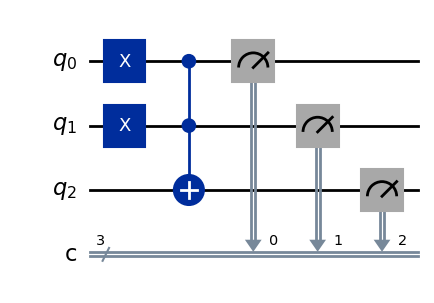


Result: {'111': 1}


In [23]:
qc = QuantumCircuit(3, 3)

# Set both control qubits (q0, q1) to |1>
qc.x(0)
qc.x(1)

# Apply the Toffoli gate with q0, q1 as controls and q2 as target
qc.ccx(0, 1, 2)
qc.measure([0,1,2], [0,1,2])

print("Toffoli Gate Circuit:")
display(qc.draw('mpl'))

# The initial state was |011> (q2=0, q1=1, q0=1). The final should be |111>.
job = simulator.run(qc, shots=1)
counts = job.result().get_counts()
print(f"\nResult: {counts}")

## End of Day 1

Congratulations! You've covered the fundamental building blocks of quantum computing: Qubits, Superposition, Measurement, a full range of Single and Multi-Qubit Gates, and Entanglement. You are well-prepared for Day 2!